# Part 1 ‑ Exploratory data analysis

In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# read logins.json into dataframe
df_logins=pd.read_json(r"C:\A\Education\Data Science\Ultimate Technologies Inc\logins.json")

In [3]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# check the imformation of the dataframe, there is no missing value
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# set login_time as index
df_logins=df_logins.set_index('login_time')

In [6]:
df_logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
# add a column "number_of_login" into the dataframe
df_logins['number_of_login']=1

In [8]:
df_logins.head()

,number_of_login
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [9]:
# aggregate number of login based on 15 minutes interval
df_15=df_logins.resample("15Min").count() 

In [10]:
df_15.head()

,number_of_login
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [11]:
df_15.describe()

,number_of_login
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


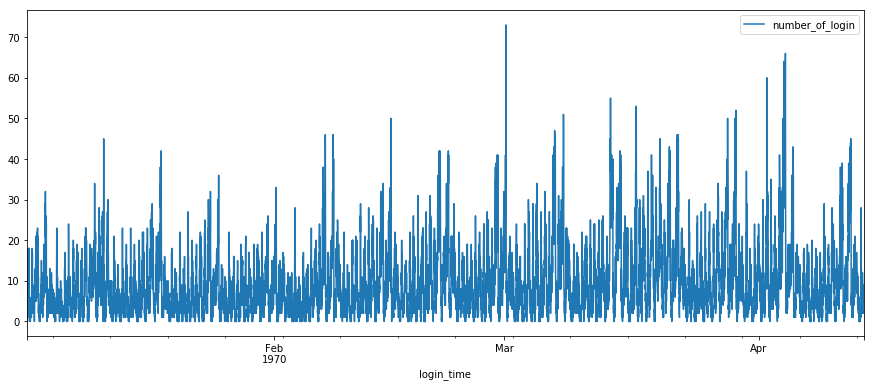

In [15]:
# plot the dataframe to have peek of the data
df_15.plot(figsize=(15, 6))
plt.show()

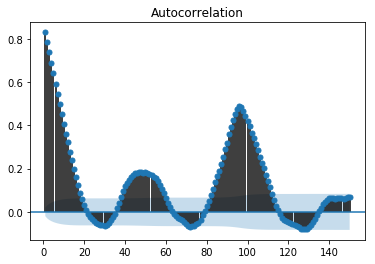

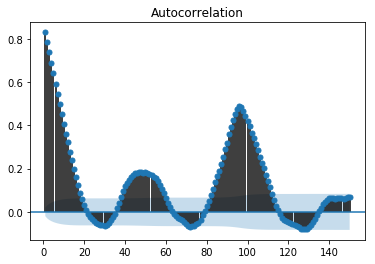

In [17]:
# plot acf for 150 lags, it seems that there is a seasonal pattern with frequency 50
sm.graphics.tsa.plot_acf(df_15, zero=False,lags=150)

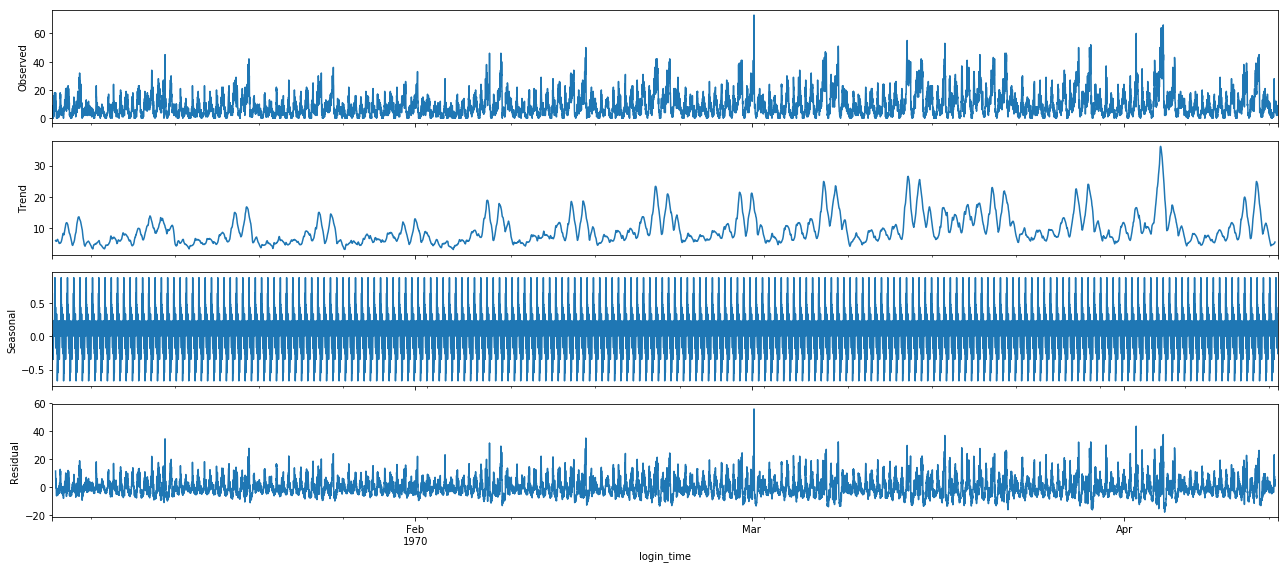

In [18]:
# decompose the dataframe
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_15,freq=50)
fig = decomposition.plot()
plt.show()